# Week 5 Notes

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")

In [3]:
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [13]:
lr_fit.coef_

AttributeError: 'LinearRegression' object has no attribute 'summary_function'

In [14]:
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)



In [11]:
import plotnine as plt
from plotnine import *

In [22]:
df_total = pd.DataFrame({
    "observed": y_test,
    "pred_lr": y_pred_lr,
    "pred_dt": y_pred_dt,
    "pred_knn": y_pred_knn,
    
})

df_total = df_total.melt(id_vars='observed', var_name='model', value_name='prediction')

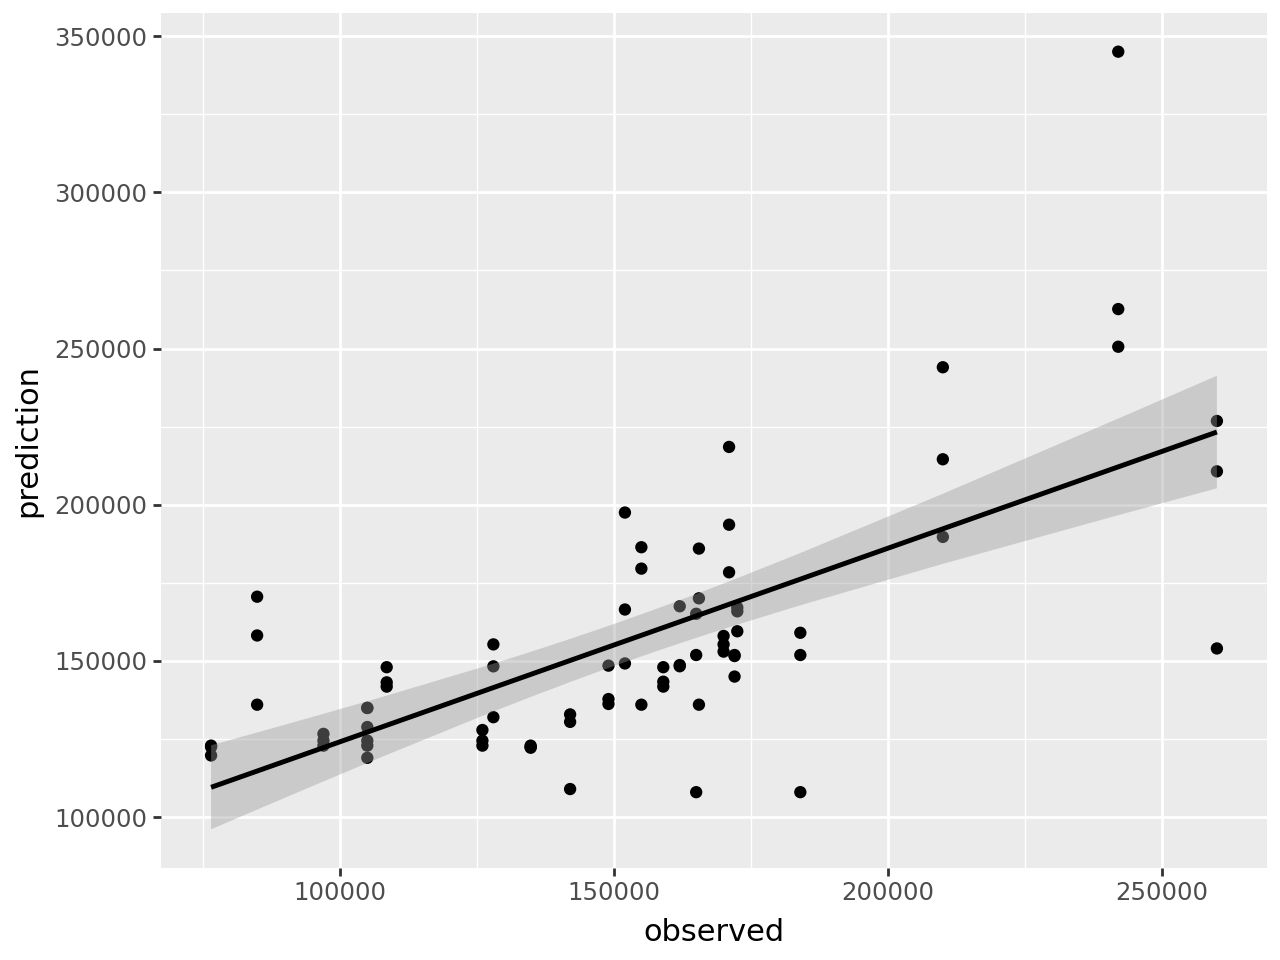

In [23]:
ggplot( df_total, aes(x="observed", y="prediction")) + geom_point() + geom_smooth(method='lm')

In [32]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_dt))



847377520.16
618553102.2401183
1906109977.76
